## Epileptic Seizure multiclass (Normal, Pre-Seizure, & Seizure States ) Classification 
### ExtraTreesClassifier

In [7]:
import numpy as np
import pandas as pd
import random
import csv

import matplotlib.pylab as plt
import seaborn as sns
sns.despine()

from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV, cross_val_score, \
                                    cross_validate, GridSearchCV

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score, classification_report_imbalanced, \
                                sensitivity_specificity_support, sensitivity_score, \
                                geometric_mean_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve, roc_auc_score, \
            precision_score, accuracy_score

from sklearn.ensemble import ExtraTreesClassifier

# Define random state
random_state = 2018
np.random.seed(random_state)

<Figure size 432x288 with 0 Axes>

### 1. chb01 Completed

In [2]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb01_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [3]:
df["sz"].value_counts()

0    284533
2      5267
Name: sz, dtype: int64

In [4]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time','delta_data', 'theta_data', 'alpha_data', 'beta_data'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = ExtraTreesClassifier(random_state=random_state, class_weight='balanced')

params = {'n_estimators' : [60, 70, 80, 90, 100, 120, 140, 160]
             }

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_weighted', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] n_estimators=60 .................................................
[CV] ........ n_estimators=60, score=0.9827778492264831, total= 1.2min
[CV] n_estimators=60 .................................................
[CV] ......... n_estimators=60, score=0.983796050364335, total= 1.2min
[CV] n_estimators=60 .................................................
[CV] ........ n_estimators=60, score=0.9845283754668707, total= 1.2min
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min


[CV] ........ n_estimators=60, score=0.9846395150077415, total= 1.3min
[CV] n_estimators=70 .................................................
[CV] ........ n_estimators=70, score=0.9845668647476987, total= 1.4min
[CV] n_estimators=70 .................................................
[CV] ........ n_estimators=70, score=0.9841629322428783, total= 1.5min
[CV] n_estimators=70 .................................................
[CV] ........ n_estimators=70, score=0.9835385511267727, total= 1.4min
[CV] n_estimators=80 .................................................
[CV] ........ n_estimators=70, score=0.9826550678719577, total= 1.5min
[CV] n_estimators=80 .................................................
[CV] ........ n_estimators=70, score=0.9846552167214033, total= 1.5min
[CV] n_estimators=80 .................................................
[CV] ........ n_estimators=70, score=0.9846901964270357, total= 1.5min
[CV] n_estimators=80 .................................................
[CV] .

[CV] ........ n_estimators=140, score=0.985192724315678, total= 3.1min
[CV] n_estimators=160 ................................................
[CV] ....... n_estimators=140, score=0.9826116055255321, total= 2.9min
[CV] n_estimators=160 ................................................
[CV] ....... n_estimators=140, score=0.9850303716550819, total= 3.0min
[CV] n_estimators=160 ................................................
[CV] ....... n_estimators=160, score=0.9848467573175377, total= 3.4min
[CV] n_estimators=160 ................................................
[CV] ....... n_estimators=160, score=0.9837788642490094, total= 3.4min
[CV] n_estimators=160 ................................................
[CV] ........ n_estimators=160, score=0.983840467325848, total= 3.3min
[CV] ....... n_estimators=160, score=0.9831420142358357, total= 3.6min
[CV] ....... n_estimators=160, score=0.9850401587456147, total= 3.4min
[CV] ....... n_estimators=160, score=0.9847673194751042, total= 3.4min
[CV] .

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 25.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2018,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [60, 70, 80, 90, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=4)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=140, n_jobs=1, oob_score=False, random_state=2018,
           verbose=0, warm_start=False)
{'n_estimators': 140}
...................................................................


Accuracy of EDT Model: 0.9874166091557396


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9883    0.9990    0.3638    0.9936    0.9281    0.8715     85354
Pre-seizure     0.8716    0.3638    0.9990    0.5133    0.9281    0.8514      1586

avg / total     0.9862    0.9874    0.3754    0.9849    0.9281    0.8711     86940

....................................................................


sensitivity_specificity None: (array(

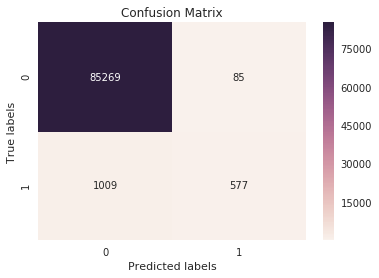

In [9]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of EDT Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))

### 3. chb06 running

In [10]:
lebaledCSVFilePath = '/home/mirwais/notebooks/paper_3/data/lebaled/chb02_time_freq_segments.csv'
df = pd.read_csv(lebaledCSVFilePath)
df.columns.size

44

In [12]:
df["sz"].value_counts()

0    122153
2      2047
Name: sz, dtype: int64

In [13]:
# With F1 Score
x = df.drop(['sz','recordingID','Unnamed: 0','time'], axis=1)
#x = featuresUnstack.drop(['sz'], axis=1)
y = df['sz']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=random_state)

#dissimilar scales of data, StandardScaler should be used
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = random_state)

clf = ExtraTreesClassifier(random_state=random_state, class_weight='balanced')

params = {'n_estimators' : [80, 100, 120, 140, 150, 160]
             }

grid_sclf = GridSearchCV(estimator = clf, param_grid = params, cv = cv, n_jobs=-1, scoring='f1_macro', verbose=4)
grid_sclf.fit(x_train_std, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] n_estimators=80 .................................................
[CV] ........ n_estimators=80, score=0.7174072032134298, total=  24.9s
[CV] n_estimators=80 .................................................
[CV] ........ n_estimators=80, score=0.6785646377791392, total=  26.1s
[CV] n_estimators=80 .................................................
[CV] ........ n_estimators=80, score=0.7100636702371413, total=  26.5s
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   59.7s


[CV] ........ n_estimators=80, score=0.6934911381693386, total=  26.5s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.7001586279828957, total=  32.0s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.6832159960766124, total=  31.7s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.7045410734797536, total=  32.9s
[CV] n_estimators=120 ................................................
[CV] ....... n_estimators=100, score=0.7001582632176612, total=  33.3s
[CV] n_estimators=120 ................................................
[CV] ....... n_estimators=100, score=0.6912482566248257, total=  33.6s
[CV] n_estimators=120 ................................................
[CV] ....... n_estimators=100, score=0.7088758428272495, total=  33.1s
[CV] n_estimators=120 ................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2018, shuffle=True),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2018,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [80, 100, 120, 140, 150, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=4)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=140, n_jobs=1, oob_score=False, random_state=2018,
           verbose=0, warm_start=False)
{'n_estimators': 140}
...................................................................


Accuracy of Decision Tree Model: 0.9874932903918411


                   pre       rec       spe        f1       geo       iba       sup

     Normal     0.9876    0.9999    0.2430    0.9937    0.9774    0.9572     36651
Pre-seizure     0.9673    0.2430    0.9999    0.3885    0.9774    0.9534       609

avg / total     0.9872    0.9875    0.2554    0.9838    0.9774    0.9572     37260

....................................................................


sensitivity_specificity Non

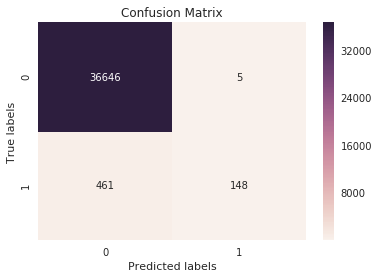

In [14]:
print(grid_sclf.best_estimator_)
print(grid_sclf.best_params_)
print('...................................................................\n\n')

#Prediction
y_predict = grid_sclf.predict(x_test_std)

print('Accuracy of Decision Tree Model: {}\n\n' .format((accuracy_score(y_test,y_predict))))

#generate and plot confusion matrix
dsvm_cm = confusion_matrix(y_test,y_predict)

ax= sns.heatmap(dsvm_cm, annot=True, fmt="d")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#Classification Report 
target_names = ['Normal', 'Pre-seizure', 'Seizure']

#print(classification_report(y_test, y_predict, digits=4, target_names=target_names))
print(classification_report_imbalanced(y_test, y_predict, target_names=target_names, digits=4))

print('....................................................................\n\n')

#micro recall, precesion, specificity
for i in [None, 'micro', 'macro', 'weighted']:
    print('sensitivity_specificity {}: {}'.format(i, sensitivity_specificity_support(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\ngemetric mean {}: {}'.format(i ,geometric_mean_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nF1 {}: {}'.format(i, f1_score(y_test, y_predict, average=i)))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nprecision {}: {}'.format(i,precision_score(y_test, y_predict, average='micro')))
print('\n')
for i in [None, 'micro', 'macro', 'weighted']:
    print('\n\nrecall {}: {}'.format(i, recall_score(y_test, y_predict, average='micro')))